# Data Viz

In [1]:
## ------------------------Installing libraries------------------------------------------------
# Install from CRAN
#install.packages("tidyverse")
#install.packages("lubridate")
#install.packages("openxlsx")
#install.packages("Hmisc")

In [3]:
##______________________________ LOADING LIBRARIES________________________
library(readr)
library(tidyverse)
library(lubridate)
library(ggplot2)
library(openxlsx)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# Functions

## This function reads csv data files
read_data <- function(filename, delim_f, skip_f) {
    
    ## Read data file
    data <- read_delim(filename, delim=delim_f, skip=skip_f,
                   col_names=c("datetime","O3","NO2","SO2","CO","PM10","TEMP","PREC","RAD"), show_col_types = FALSE)
    # show_col_types = TRUE shows the column types to explicit what each column contains

    return(data)
}

In [5]:
## Specify settings
#Sys.setlocale("LC_TIME","C")
Sys.setlocale("LC_ALL","English")
options(stringsAsFactors=FALSE)
theme_set(theme_bw()) # just my preference for plots

Warning message in Sys.setlocale("LC_ALL", "English"):
"using locale code page other than 65001 ("UTF-8") may cause problems"


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [6]:
## ------------------LOADING DATA------------------------------------------------------
## Define input file (located in same directory)
BASEL <- "./Data/BAS.csv"
file.exists(BASEL)

DAVOS <- "./Data/DAV.csv"
file.exists(DAVOS)

[1] TRUE

[1] TRUE

In [7]:
##____________________READING DATA_____________
#DAVOS_data <- read_data(DAVOS, ";", 6)
DAVOS_data <- read_delim(DAVOS, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","PM10","NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# BASEL_data <- read_data(BASEL, ";", 6)
## Read data file
BASEL_data <- read_delim(BASEL, delim=";", skip=6,
               col_names=c("datetime","O3","NO2","SO2","PM10","PM2.5","EC", "CPC", "NOx","TEMP","PREC","RAD"), show_col_types = FALSE)
# show_col_types = TRUE shows the column types to explicit what each column contains


In [8]:
## ------------------------------------------------------------------------
## View information stored in object
cat("Davos dataset:\n")
str(DAVOS_data)

cat("\nBasel dataset:\n")
str(BASEL_data)

Davos dataset:
spc_tbl_ [8,784 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ datetime: chr [1:8784] "01.01.2024 01:00" "01.01.2024 02:00" "01.01.2024 03:00" "01.01.2024 04:00" ...
 $ O3      : num [1:8784] 57.7 55.2 49.9 52.1 65.8 67.1 64 58.4 61.8 59 ...
 $ NO2     : num [1:8784] 1.9 2.1 3.7 4.5 0.7 0.7 3.4 5.4 1.7 2.9 ...
 $ PM10    : num [1:8784] 1.2 1.5 2.2 3 0.2 0.4 0.3 0.3 0.3 0.4 ...
 $ NOx     : num [1:8784] 1.9 2.1 3.7 4.6 0.7 0.7 3.5 5.4 1.8 3.4 ...
 $ TEMP    : num [1:8784] -2.2 -2.8 -3.3 -4.2 -5.2 -5.6 -5.7 -5.9 -5.7 -5.3 ...
 $ PREC    : num [1:8784] 0 0 0 0 0 0 0 0 0 0 ...
 $ RAD     : num [1:8784] -0.6 -0.7 -0.7 -1.1 -1.3 -0.8 -0.6 -0.6 22.6 73.9 ...
 - attr(*, "spec")=
  .. cols(
  ..   datetime = col_character(),
  ..   O3 = col_double(),
  ..   NO2 = col_double(),
  ..   PM10 = col_double(),
  ..   NOx = col_double(),
  ..   TEMP = col_double(),
  ..   PREC = col_double(),
  ..   RAD = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 

Basel dataset:
spc_tbl

In [9]:
## ------------------------------------------------------------------------
## View first 6 lines
cat("DAVOS:\n")
head(DAVOS_data)
cat("\nBASEL:\n")
head(BASEL_data)

DAVOS:


datetime,O3,NO2,PM10,NOx,TEMP,PREC,RAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2024 01:00,57.7,1.9,1.2,1.9,-2.2,0,-0.6
01.01.2024 02:00,55.2,2.1,1.5,2.1,-2.8,0,-0.7
01.01.2024 03:00,49.9,3.7,2.2,3.7,-3.3,0,-0.7
01.01.2024 04:00,52.1,4.5,3.0,4.6,-4.2,0,-1.1
01.01.2024 05:00,65.8,0.7,0.2,0.7,-5.2,0,-1.3
01.01.2024 06:00,67.1,0.7,0.4,0.7,-5.6,0,-0.8



BASEL:


datetime,O3,NO2,SO2,PM10,PM2.5,EC,CPC,NOx,TEMP,PREC,RAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01.01.2024 01:00,60.2,7.5,1.6,35.8,25.2,0.4,10340.6,8.7,5.5,0.0,0.0
01.01.2024 02:00,70.0,1.9,0.7,7.2,4.4,0.1,2394.0,2.5,6.6,0.0,0.0
01.01.2024 03:00,70.3,1.5,0.4,3.7,1.8,0.0,1341.2,2.1,5.7,1.4,0.0
01.01.2024 04:00,67.0,1.3,0.3,2.0,1.0,0.0,1172.6,2.0,5.7,0.0,0.0
01.01.2024 05:00,66.5,2.0,0.3,2.9,1.4,0.1,1308.0,2.7,5.7,0.0,0.2
01.01.2024 06:00,67.1,2.7,0.3,4.6,2.1,0.1,1455.6,3.3,5.9,0.0,0.0


In [10]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "Europe/Paris")

# Using $ to access the datetime column 
## TO DO only once
DAVOS_data$datetime <- parse_date_time(DAVOS_data$datetime, "%d.%m.%Y %H:%M", tz = "Etc/GMT-1")

ERROR: Error in C_force_tz(to_posixct(time), tz, roll_dst): CCTZ: Unrecognized output timezone: "Etc/GMT-1"


In [ ]:
# Extract the month
DAVOS_data[["month"]] <- month(DAVOS_data[["datetime"]])

# Extract the date (without time)
DAVOS_data[["date"]] <- date(DAVOS_data[["datetime"]])

# Check the results
head(DAVOS_data)

In [ ]:
## ---- fig.width=8, fig.height=5------------------------------------------
ggplot(DAVOS_data)+
  geom_line(aes(datetime, O3))

In [ ]:
# Parse the datetime with the 'Europe/Paris' timezone
# Parse the datetime column (assuming it's named correctly)
##data[["datetime"]] <- parse_date_time(data[["datetime"]], "%d.%m.%Y %H:%M", tz = "CEST")

# Using $ to access the datetime column
BASEL_data$datetime <- parse_date_time(BASEL_data$datetime, "%d.%m.%Y %H:%M", tz = "Etc/GMT-1")

In [ ]:
#checking table rows 
invalid_rows <- which(is.na(BASEL_data$datetime))
invalid_rows
invalid_dates <- BASEL_data[is.na(BASEL_data$datetime), ]
invalid_dates

In [ ]:
# Extract the month
BASEL_data[["month"]] <- month(BASEL_data[["datetime"]])

# Extract the date (without time)
BASEL_data[["date"]] <- date(BASEL_data[["datetime"]])

# Check the results
head(BASEL_data)

## Problem 3

In [ ]:
reg_val <- "./Data/Regulatory_values.xlsx"
file.exists(reg_val)

limits.daily <- read.xlsx(reg_val, sheet = 1)

In [ ]:
# Second option
limits.daily <- tibble(value=c(100,80,8,50),
                       variable=c("SO2","NO2","CO","PM10"))

In [11]:
limits.daily

ERROR: Error: objet 'limits.daily' introuvable


In [12]:
Sys.setlocale("LC_TIME","C")
options(stringsAsFactors=FALSE)
options(dplyr.summarise.inform = FALSE)
theme_set(theme_bw()) # just my preference for plots

[1] "C"

In [13]:
month2season <- function(month) {
  ## month is an integer (1-12)
  ## a factor with levels {"Winter : DJF", "Spring : MAM", "Summer : JJA", "Autumn : SON"} is returned
  seasons <- c("Winter", "Spring", "Summer", "Autumn")
  index <- findInterval(month %% 12, seq(0, 12, 3))
  factor(seasons[index], seasons)
}

wday2type <- function(wday) {
  ## wday is an integer with 1 = Monday, 2 = Tuesday, ... and 7 = Sunday
  c("Weekday", "Weekend")[(unclass(wday) - 1) %/% 5 + 1]
}

In [55]:
month2season(c(1, 2, 3))

[1] Winter Winter Spring
Levels: Winter Spring Summer Autumn

In [56]:
read_tseries <- function(filename, timecolumn = "Date/time", timeformat = "%d.%m.%Y %H:%M", tz = "Etc/GMT-1", delta = 3600) {
  ## read the table, strip units in column names, rename time column
  ##   and change data type of time column from a string of characters to
  ##   a numeric type so that we can perform operations on it

  data <- read_delim(filename, skip = 5, delim = ";", locale = locale(encoding = "Latin1"), show_col_types = FALSE)

  out <- data %>%
    rename_with(.fn = function(x) sub("[ ].*$", "", x)) %>% # strip units for simplification
    rename(datetime = !!timecolumn) %>%
    mutate(datetime = parse_date_time(datetime, !!timeformat, !!tz) - !!delta) %>%
    mutate(year = year(datetime),
           month = month(datetime),
           day = day(datetime),
           hour = hour(datetime),
           dayofwk = wday(datetime, label = TRUE, week_start = 1),
           daytype = wday2type(dayofwk),
           season = month2season(month),
           .after = datetime)
}

In [57]:
all_data_df <- read.csv("Data/All_dat_df.csv")

In [58]:
all_data_df

site,datetime,year,month,day,hour,dayofwk,daytype,season,O3,...,NOX,TEMP,PREC,RAD,SO2,PM2.5,EC,CPC,avg_wind_speed,avg_wind_direction
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,57.7,...,1.9,-2.2,0,-0.6,NA,NA,NA,NA,1.0980000,36.25794
DAV,2024-01-01 01:00:00,2024,1,1,1,Mon,Weekday,Winter,55.2,...,2.1,-2.8,0,-0.7,NA,NA,NA,NA,0.9216667,40.71351
DAV,2024-01-01 02:00:00,2024,1,1,2,Mon,Weekday,Winter,49.9,...,3.7,-3.3,0,-0.7,NA,NA,NA,NA,0.6716667,150.12313
DAV,2024-01-01 03:00:00,2024,1,1,3,Mon,Weekday,Winter,52.1,...,4.6,-4.2,0,-1.1,NA,NA,NA,NA,0.5250000,40.87731
DAV,2024-01-01 04:00:00,2024,1,1,4,Mon,Weekday,Winter,65.8,...,0.7,-5.2,0,-1.3,NA,NA,NA,NA,1.4700000,186.90946
DAV,2024-01-01 05:00:00,2024,1,1,5,Mon,Weekday,Winter,67.1,...,0.7,-5.6,0,-0.8,NA,NA,NA,NA,1.9350000,184.88936
DAV,2024-01-01 06:00:00,2024,1,1,6,Mon,Weekday,Winter,64.0,...,3.5,-5.7,0,-0.6,NA,NA,NA,NA,1.7316667,173.35654
DAV,2024-01-01 07:00:00,2024,1,1,7,Mon,Weekday,Winter,58.4,...,5.4,-5.9,0,-0.6,NA,NA,NA,NA,0.9916667,77.91124
DAV,2024-01-01 08:00:00,2024,1,1,8,Mon,Weekday,Winter,61.8,...,1.8,-5.7,0,22.6,NA,NA,NA,NA,0.7516667,86.64809


In [59]:
write.csv(all_data_df, "DATA/DAV-BAS.csv")

In [60]:
all_data_lf <- all_data_df %>%
  pivot_longer(-c(site, datetime, season, year, month, day, hour, dayofwk, daytype),  # id columns
               names_to = "variable",
               values_to = "value")

In [64]:
all_data_lf$datetime1 <- as.POSIXct(all_data_lf$datetime)
all_data_lf

site,datetime,year,month,day,hour,dayofwk,daytype,season,variable,value,datetime1
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dttm>
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,O3,57.7000000,2024-01-01
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,NO2,1.9000000,2024-01-01
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PM10,1.2000000,2024-01-01
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,NOX,1.9000000,2024-01-01
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,TEMP,-2.2000000,2024-01-01
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PREC,0.0000000,2024-01-01
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,RAD,-0.6000000,2024-01-01
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,SO2,NA,2024-01-01
DAV,2024-01-01 00:00:00,2024,1,1,0,Mon,Weekday,Winter,PM2.5,NA,2024-01-01


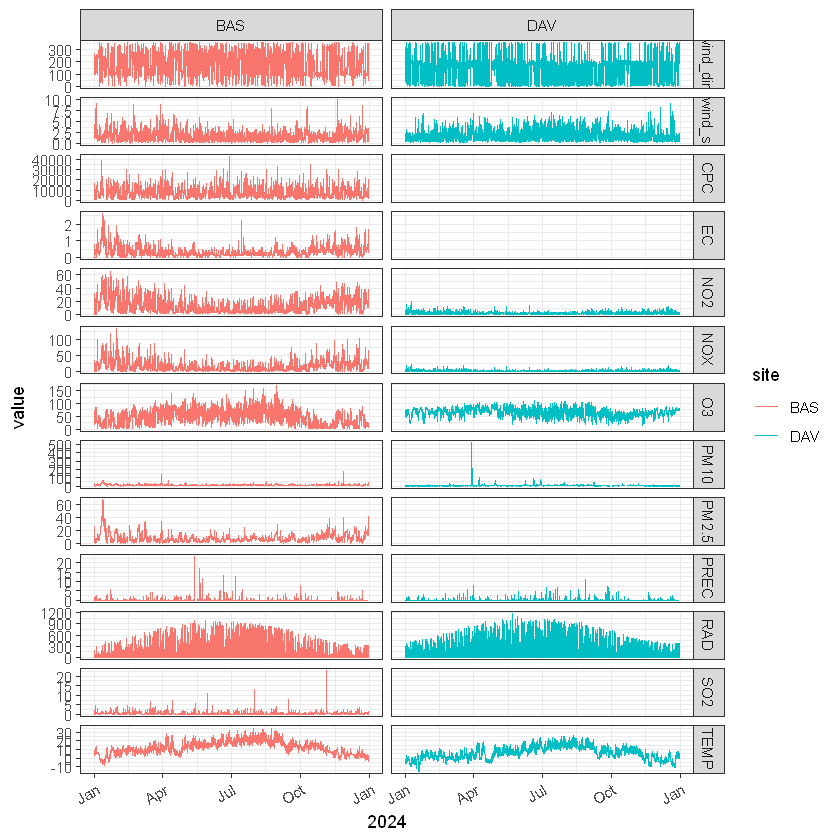

In [65]:
  ggplot(all_data_lf)+                                        # `lf` is the data frame
  facet_grid(variable~site, scale="free_y")+         # panels created out of these variables
  geom_line(aes(datetime1, value, color=site))+       # plot `value` vs. `time` as lines
  scale_x_datetime("2024", date_labels = "%b") +
  theme(axis.text.x=element_text(angle=30, hjust=1)) # rotate x-axis labels

## geom_line counts the segments and not the actual number of NA values removed

In [2]:
plot <-all_data_lf %>%
 filter(variable=="NOX", site == "DAV", month==1)%>%# `lf` is the data frame
ggplot+
geom_line(aes(datetime1, value, color=site))+       # plot `value` vs. `time` as lines
  scale_x_datetime(date_labels = "%d", date_breaks = "1 day") +
  theme(axis.text.x=element_text(angle=30, hjust=1))+ # rotate x-axis labels
labs( 
    x= "days", 
    y = "NOX" )
plot
## geom_line counts the segments and not the actual number of NA values removed

ERROR: Error in all_data_lf %>% filter(variable == "NOX", site == "DAV", month == : impossible de trouver la fonction "%>%"


## function that allows to extract dates of extreme values 

In [80]:
library(dplyr)

high_SO2_dates <- all_data_lf %>%
  filter(variable == "SO2", value > 5) %>%
  pull(datetime, value)  # or select(datetime1) if you want a data frame

print(high_SO2_dates)


                  6.8                   7.3                   5.6 
"2024-03-15 09:00:00" "2024-04-14 07:00:00" "2024-05-14 07:00:00" 
                 10.9                  13.2                   7.7 
"2024-05-30 02:00:00" "2024-08-01 21:00:00" "2024-09-15 18:00:00" 
                 22.7 
"2024-11-05 15:00:00" 


In [81]:
## There are more NA values than segments because we have consecutive Na Values
sum(is.na(all_data_lf$value))

[1] 36281

## checking data completeness

In [82]:
colSums(is.na(DAVOS_data))

datetime       O3      NO2     PM10      NOx     TEMP     PREC      RAD 
       0       18       22       98       22        0        1        0 
   month     date 
       0        0

In [83]:
colSums(is.na(BASEL_data))

datetime       O3      NO2      SO2     PM10    PM2.5       EC      CPC 
       0       67       74       68      113      281       48      187 
     NOx     TEMP     PREC      RAD    month     date 
      74        0       72        0        0        0

In [84]:
colSums(is.na(all_data_df))

site           datetime               year              month 
                 0                  0                  0                  0 
               day               hour            dayofwk            daytype 
                 0                  0                  0                  0 
            season                 O3                NO2               PM10 
                 0                 85                 96                211 
               NOX               TEMP               PREC                RAD 
                96                  0                 73                  0 
               SO2              PM2.5                 EC                CPC 
              8852               9065               8832               8971 
    avg_wind_speed avg_wind_direction 
                 0                  0

Warning message:
"Removed 36281 rows containing non-finite values (`stat_boxplot()`)."


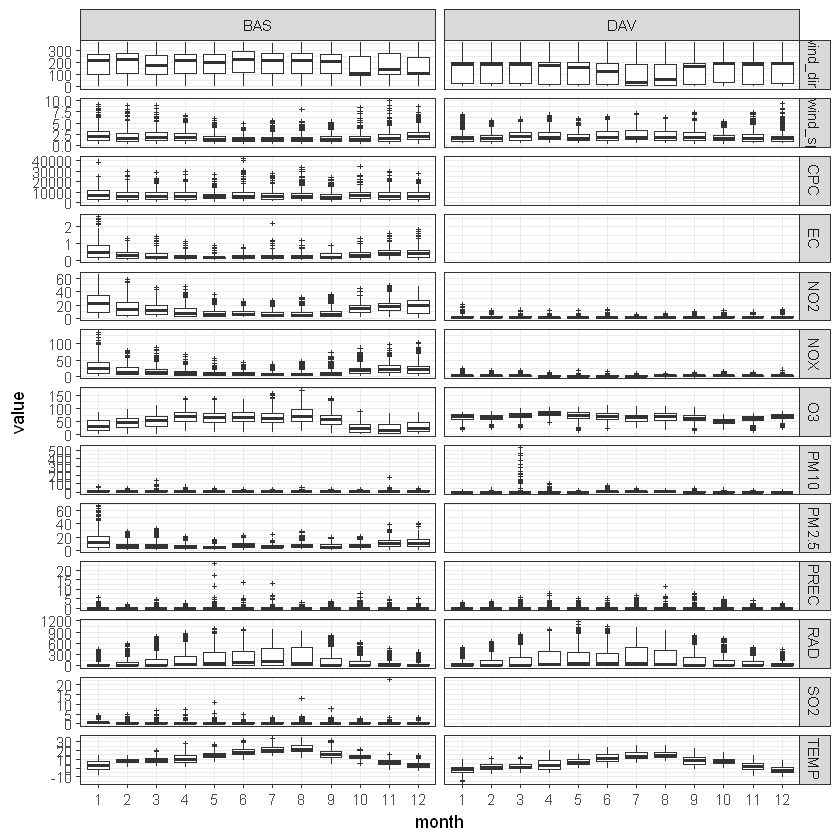

In [85]:
all_data_lf %>% 
  mutate(month = factor(month)) %>%
  ggplot +
  facet_grid(variable ~ site, scale = "free_y") +
  geom_boxplot(aes(month, value), outlier.size = 0.5, outlier.shape = 3)

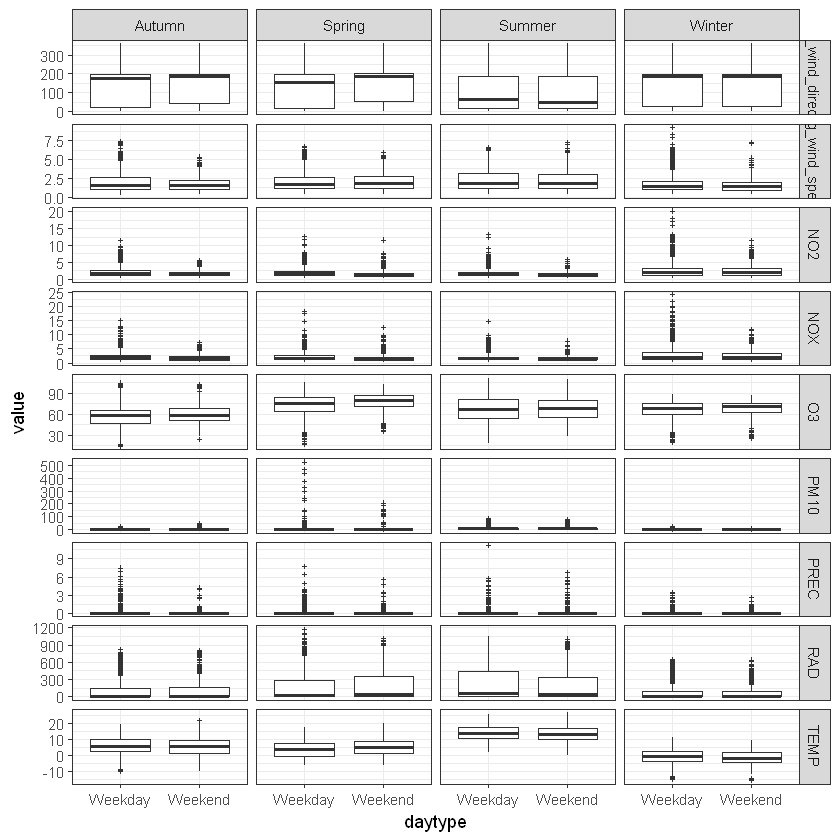

In [86]:
# DAVOS 
all_data_lf %>%
  filter(site=="DAV" & !is.na(value) & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_boxplot(aes(daytype, value), outlier.size = 0.5, outlier.shape = 3)

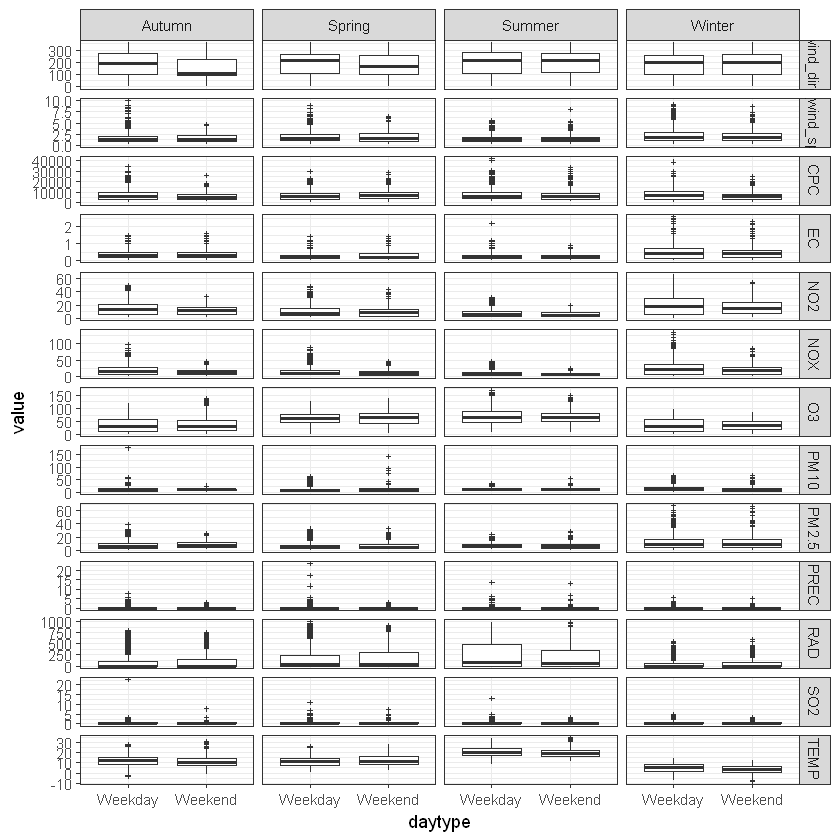

In [87]:
# BASEL
all_data_lf %>%
  filter(site == "BAS" & !is.na(value) & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_boxplot(aes(daytype, value), outlier.size = 0.5, outlier.shape = 3)

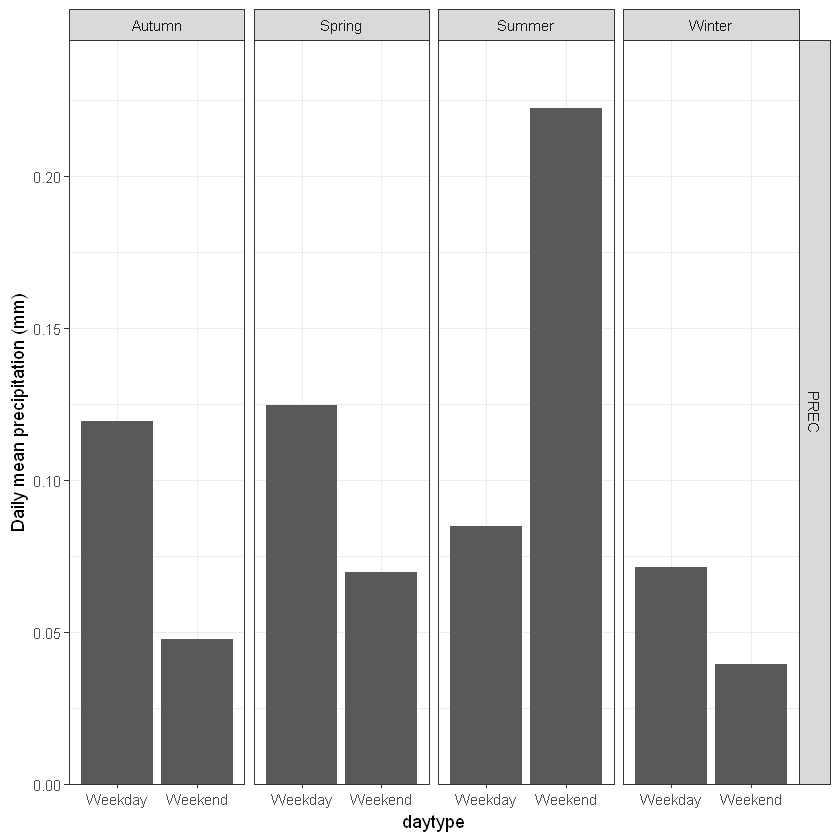

In [88]:
#DAVOS
all_data_lf %>%
  filter(site=="DAV" & !is.na(value) & variable=="PREC" & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_bar(aes(daytype, value), stat="summary", fun="mean", show.legend = FALSE) +
  scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1)))

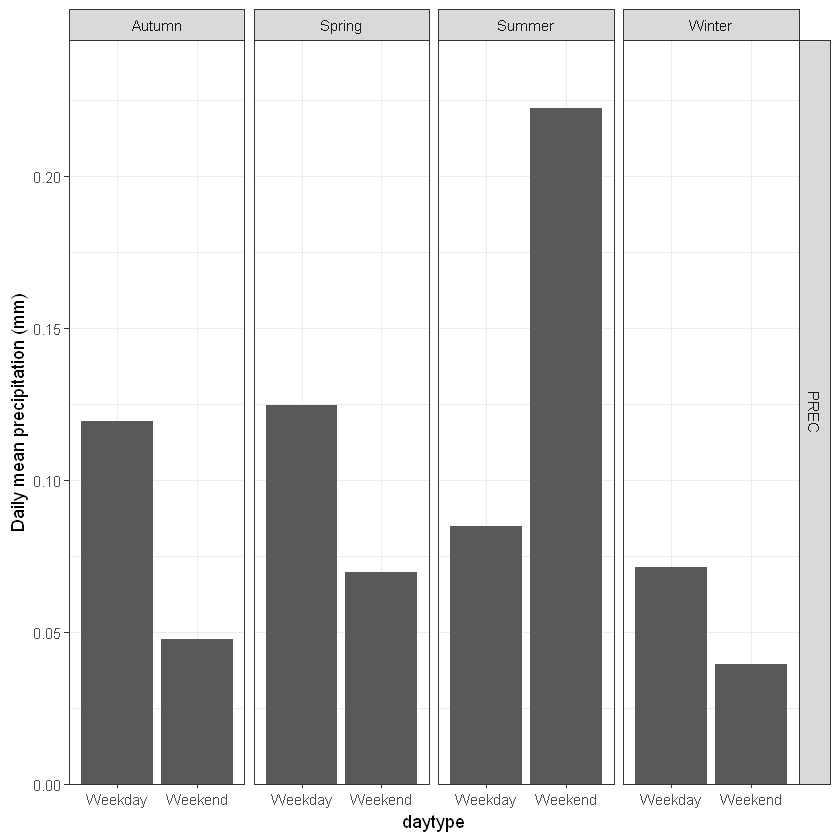

In [89]:
#DAVOS
all_data_lf %>%
  filter(site=="DAV" & !is.na(value) & variable=="PREC" & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_bar(aes(daytype, value), stat="summary", fun="mean", show.legend = FALSE) +
  scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1)))

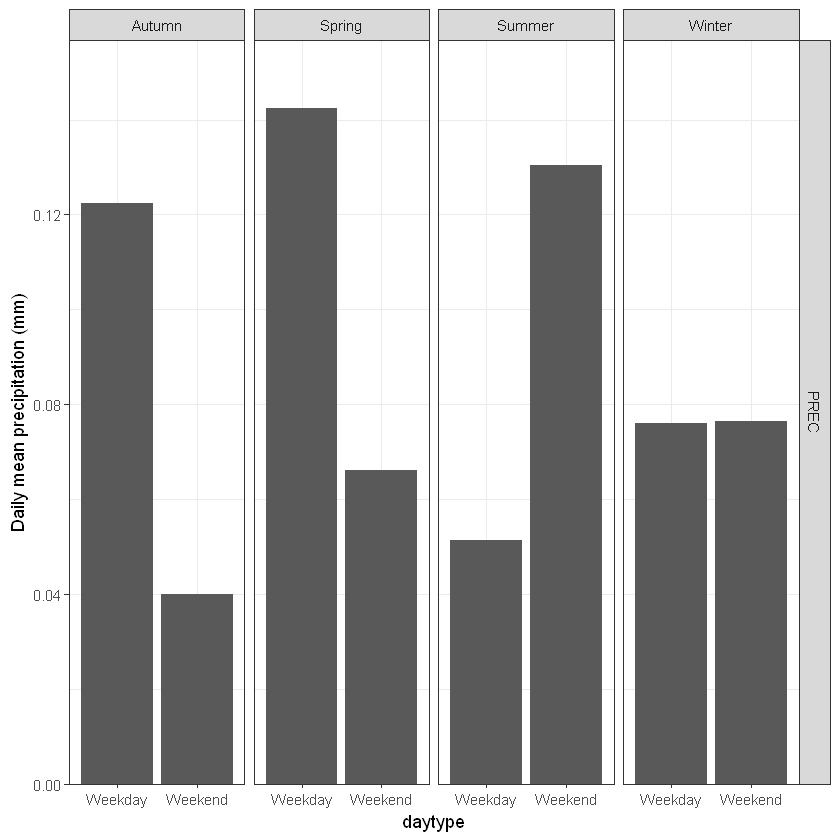

In [90]:
# BASEL
all_data_lf %>%
  filter(site=="BAS" & !is.na(value) & variable=="PREC" & !is.na(season)) %>%
  ggplot +
  facet_grid(variable ~ season, scale = "free_y") +
  geom_bar(aes(daytype, value), stat="summary", fun="mean", show.legend = FALSE) +
  scale_y_continuous("Daily mean precipitation (mm)", expand=expansion(mult=c(0, 0.1)))

## Diurnal variations

In [91]:
Percentile <- function(perc) function(x) 
  ## `perc` is the percentile which should be computed for the numeric vector `x`
  quantile(x, perc*1e-2, na.rm=TRUE)

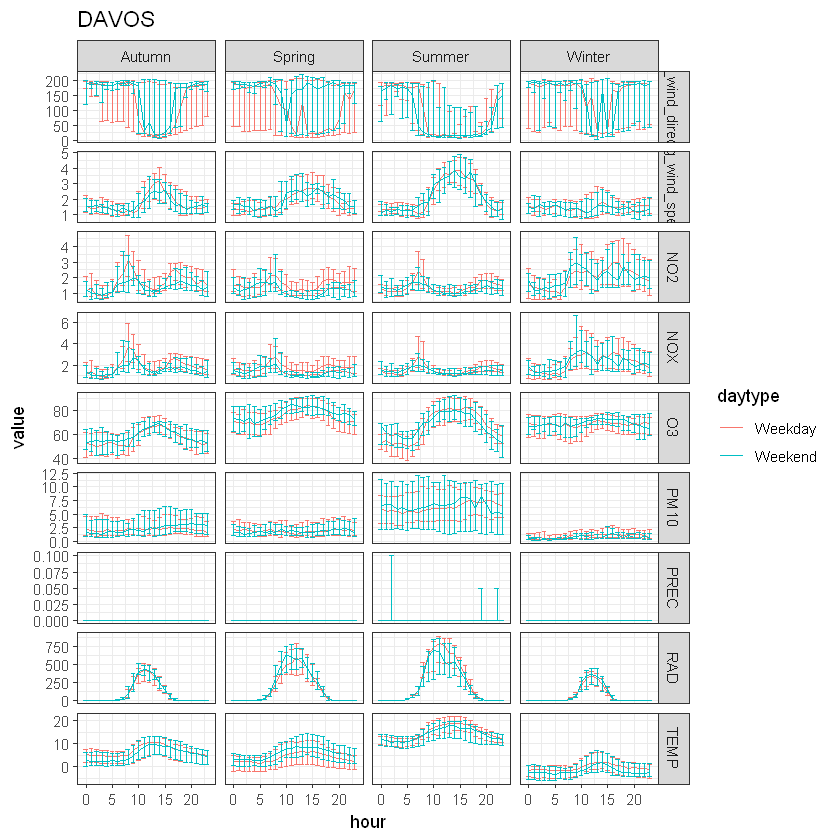

In [92]:
all_data_lf %>%
  filter(site=="DAV" & !is.na(value) & !is.na(season)) %>%
  ggplot(aes(x=hour, y=value, group=daytype, color=daytype)) +
  facet_grid(variable ~ season, scale = "free_y", drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("DAVOS")

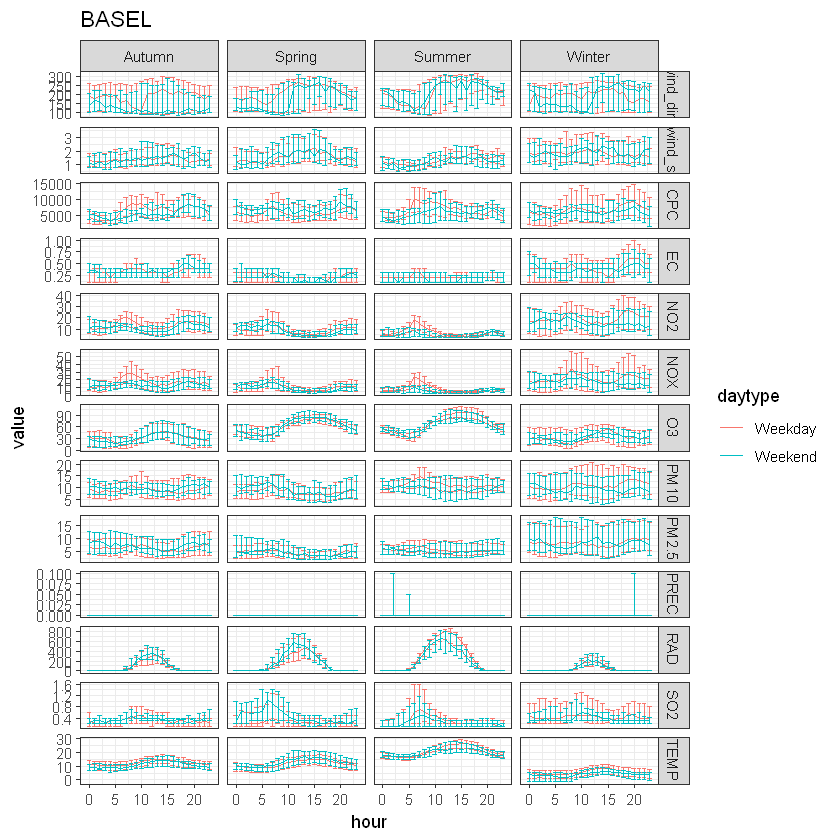

In [93]:
all_data_lf %>%
  filter(site=="BAS" & !is.na(value) & !is.na(season)) %>%
  ggplot(aes(x=hour, y=value, group=daytype, color=daytype)) +
  facet_grid(variable ~ season, scale = "free_y", drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("BASEL")

Warning message:
"Removed 85 rows containing non-finite values (`stat_summary()`)."
Warning message:
"Removed 85 rows containing non-finite values (`stat_summary()`)."


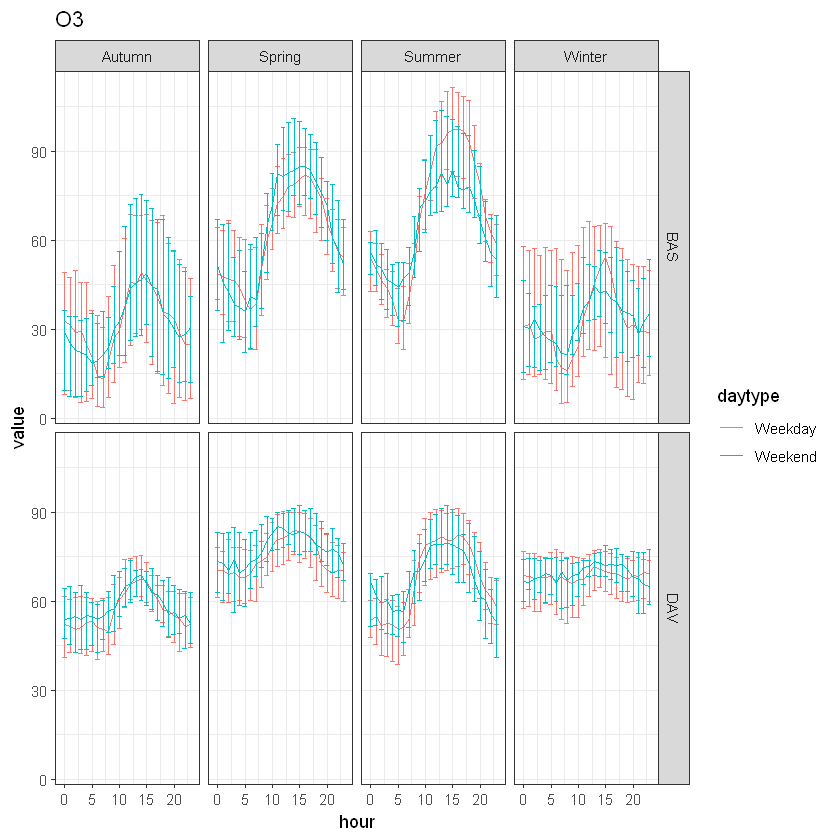

In [94]:
all_data_lf %>%
  filter(variable=="O3" & !is.na(season)) %>%
  ggplot(aes(x=hour, y=value, group=daytype, color=daytype)) +
  facet_grid(site ~ season, drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("O3")

Warning message:
"Removed 85 rows containing non-finite values (`stat_summary()`)."
Warning message:
"Removed 85 rows containing non-finite values (`stat_summary()`)."


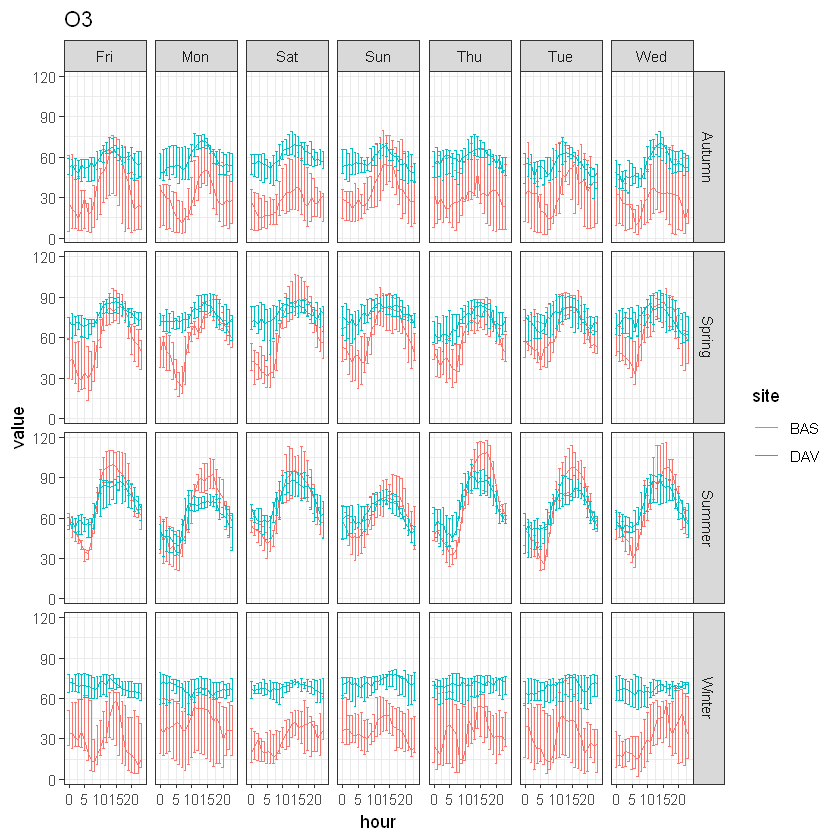

In [95]:
all_data_lf %>%
  filter(variable=="O3"& !is.na(season)) %>%
  ggplot(aes(x=hour, y=value, group=site, color=site)) +
  facet_grid(season ~ dayofwk, drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("O3")

In [96]:
Ox_lf <- all_data_lf %>% 
  filter(variable %in% c("O3", "NO2") & season=="Summer") %>%
  pivot_wider(names_from = variable, values_from = value) %>%
  mutate(Ox = O3 + NO2) %>%
  select(-NO2) %>%
  gather(variable, value, c(O3, Ox))

Warning message:
"Removed 27 rows containing non-finite values (`stat_summary()`)."
Warning message:
"Removed 27 rows containing non-finite values (`stat_summary()`)."


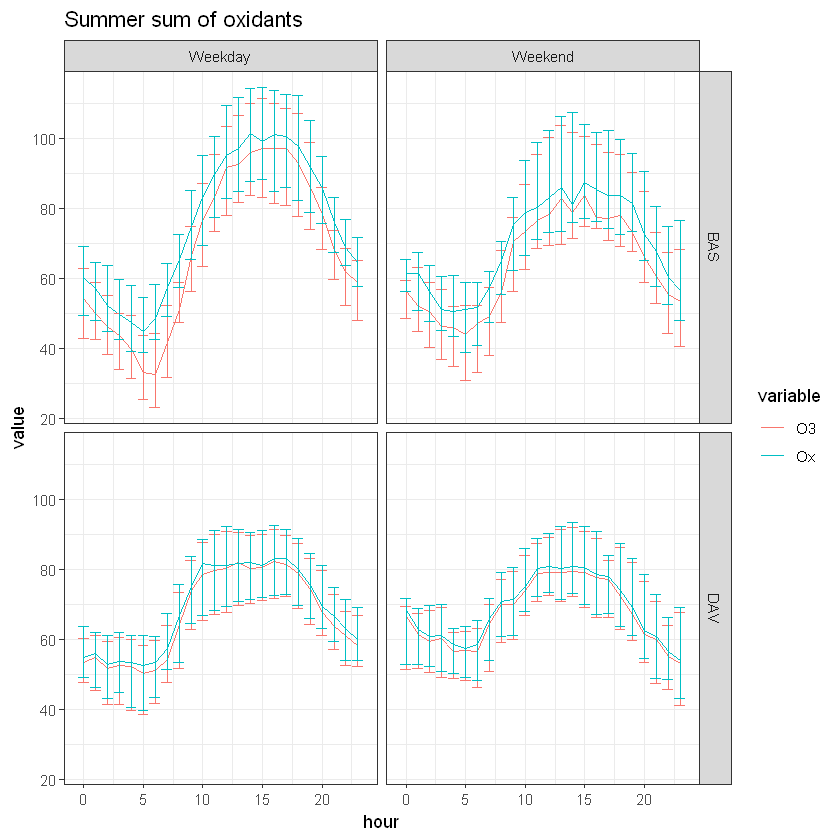

In [97]:
Ox_lf %>%
  ggplot(aes(x=hour, y=value, group=variable, color=variable)) +
  facet_grid(site ~ daytype, drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75))+
  ggtitle("Summer sum of oxidants")

Warning message:
"Removed 17 rows containing non-finite values (`stat_summary()`)."
Warning message:
"Removed 17 rows containing non-finite values (`stat_summary()`)."


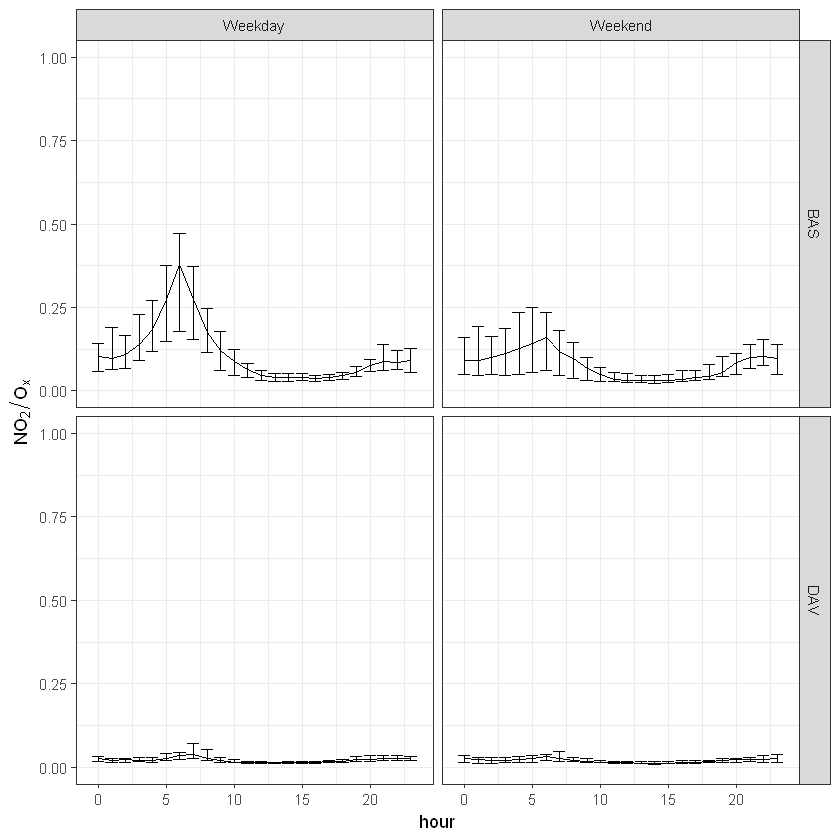

In [98]:
Ox_lf %>% 
  pivot_wider(names_from = variable, values_from = value) %>%
  mutate(ratio = 1 - O3/Ox) %>%
  ggplot(aes(x=hour, y=ratio)) +
  facet_grid(site ~ daytype, drop=TRUE) +
  geom_line(stat="summary", fun="median")+
  geom_errorbar(stat="summary",
                fun.min=Percentile(25),
                fun.max=Percentile(75)) +
  scale_y_continuous(expression(NO[2]/O[x]), limits=c(0, 1))

# Limit values

In [99]:
reg_val <- "./Data/Regulatory_values.xlsx"
file.exists(reg_val)

Regulatory_values <- read.xlsx(reg_val, sheet = 1)
Regulatory_values

[1] TRUE

,Pollutants,Annual.mean.[ug/m3],24h.mean.[ug/m3],Hourly.mean.[ug/m3]
,<chr>,<dbl>,<dbl>,<dbl>
1,O3,NA,NA,120
2,NO2,30,80,NA
3,PM10,20,50,NA
4,"PM2,5",10,NA,NA
5,SO2,30,100,NA
6,CO,NA,8,NA


In [100]:
limits.yearly<- tibble(value=c(30, 20, 10, 30),
                       variable=c("NO2","PM10", "PM2.5", "SO2"))

In [101]:
limits.daily <- tibble(value=c(80, 50, 100),
                       variable=c("NO2","PM10", "SO2"))

In [102]:
limits.hourly<- tibble(value=c(120),
                       variable=c("O3"))

In [103]:
## Mean threshold definition
threshold <- 75

## Daily limit values

In [104]:
daily_lf <- all_data_lf %>%
  filter(variable %in% limits.daily[["variable"]]) %>% # select variables
  mutate(date = date(datetime)) %>%                   # get the date value
  group_by(site, date, variable) %>%
  summarize(percent.recovery_daily = length(na.omit(value))/length(value)*1e2,
            value = mean(value, na.rm=TRUE)) %>%
  ungroup()                                            # undo grouping for future use

In [105]:
daily_lf

site,date,variable,percent.recovery_daily,value
<chr>,<date>,<chr>,<dbl>,<dbl>
BAS,2024-01-01,NO2,100.00000,6.7166667
BAS,2024-01-01,PM10,100.00000,7.0083333
BAS,2024-01-01,SO2,100.00000,0.5291667
BAS,2024-01-02,NO2,100.00000,5.7750000
BAS,2024-01-02,PM10,100.00000,2.4958333
BAS,2024-01-02,SO2,100.00000,1.0291667
BAS,2024-01-03,NO2,100.00000,1.2416667
BAS,2024-01-03,PM10,100.00000,2.8958333
BAS,2024-01-03,SO2,100.00000,0.1166667


In [106]:
# looking at the data that has less than 75% of valid datapoionts
daily_lf %>%
  filter(percent.recovery_daily < threshold) %>%
  count(site, variable)

site,variable,n
<chr>,<chr>,<int>
BAS,NO2,4
BAS,PM10,5
BAS,SO2,2
DAV,PM10,4
DAV,SO2,366


In [107]:
filter(daily_lf, percent.recovery_daily < threshold & variable=="PM10") 

site,date,variable,percent.recovery_daily,value
<chr>,<date>,<chr>,<dbl>,<dbl>
BAS,2024-10-14,PM10,0.00000,NaN
BAS,2024-10-21,PM10,0.00000,NaN
BAS,2024-10-31,PM10,0.00000,NaN
BAS,2024-12-01,PM10,58.33333,14.64286
BAS,2024-12-29,PM10,50.00000,16.20000
DAV,2024-10-01,PM10,0.00000,NaN
DAV,2024-10-14,PM10,0.00000,NaN
DAV,2024-10-21,PM10,0.00000,NaN
DAV,2024-10-31,PM10,0.00000,NaN


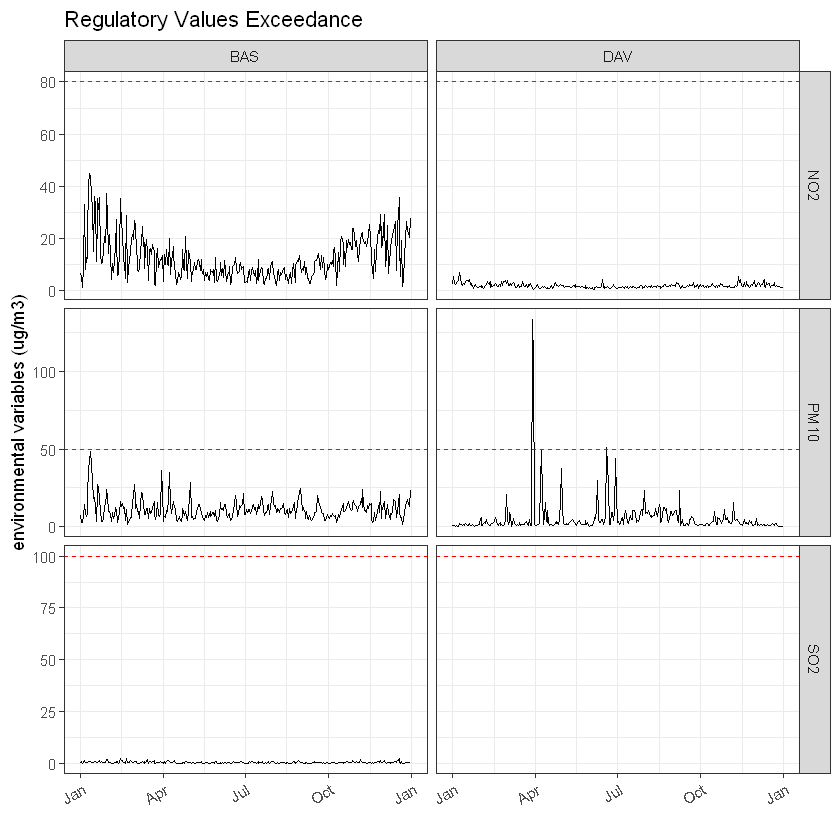

In [108]:
limit_values_overshoot <- daily_lf %>%
  filter(percent.recovery_daily >= threshold) %>%
  ggplot+
  facet_grid(variable~site, scale="free_y")+  
  geom_line(aes(x=date, y=value))+
  geom_hline(data=limits.daily, mapping=aes(yintercept=value), linetype=2, color="red")+
  scale_x_date(name = "", date_labels = "%b") +
  theme(axis.text.x=element_text(angle=30, hjust=1))+
  labs(
    x = "Months",  # Label for the x-axis
    y = "environmental variables (ug/m3)",  # Label for the y-axis
    title = "Regulatory Values Exceedance"  # Title for the plot
  )

limit_values_overshoot
ggsave("outputs/limit_values_overshoot.jpeg", plot = limit_values_overshoot, width = 6, height = 5, dpi = 300)

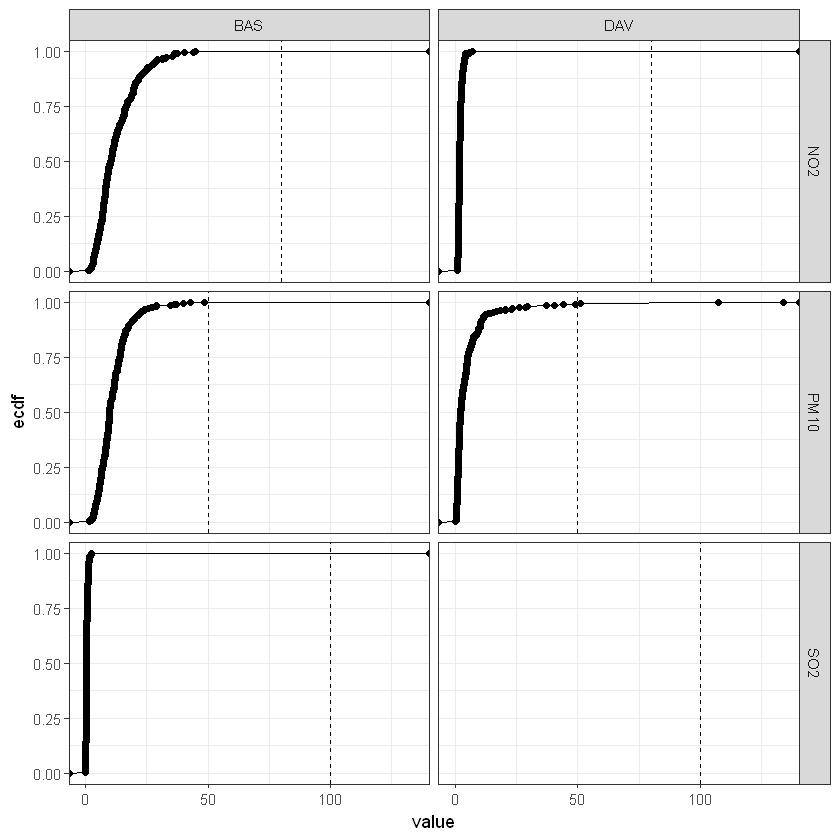

In [109]:
daily_lf %>%
  filter(percent.recovery_daily >= threshold) %>%
  ggplot+
  facet_grid(variable~site, scale="free_y")+  
  geom_line(aes(x=value), stat="ecdf")+
  geom_point(aes(x=value), stat="ecdf")+
  geom_vline(data=limits.daily, mapping=aes(xintercept=value), linetype=2)

## Tables of interest for daily exceeding values

In [110]:
(limits.vec <- with(limits.daily, setNames(value, variable)))

NO2 PM10  SO2 
  80   50  100

In [111]:
exceedances <- daily_lf %>%
  filter(percent.recovery_daily >= threshold &
         value > limits.vec[as.character(variable)])

In [112]:
tail(exceedances, 3)

site,date,variable,percent.recovery_daily,value
<chr>,<date>,<chr>,<dbl>,<dbl>
DAV,2024-03-29,PM10,100,133.76250
DAV,2024-03-30,PM10,100,107.39583
DAV,2024-06-19,PM10,100,51.05417


In [113]:
exceedances %>%
  count(site, variable)

site,variable,n
<chr>,<chr>,<int>
DAV,PM10,3


In [114]:
exceedances %>%
  mutate(month = months(date)) %>%
  count(site, variable, month)

site,variable,month,n
<chr>,<chr>,<chr>,<int>
DAV,PM10,June,1
DAV,PM10,March,2


## Yearly limit values

In [115]:
yearly_lf <- all_data_lf %>%
  filter(variable %in% limits.yearly[["variable"]]) %>% # select variables
  mutate(date = date(datetime)) %>%                   # get the date value
  group_by(site, variable) %>%
  summarize(percent.recovery_yearly = length(na.omit(value))/length(value)*1e2,
            value = mean(value, na.rm=TRUE)) %>%
  ungroup()                                            # undo grouping for future use

In [116]:
yearly_lf

site,variable,percent.recovery_yearly,value
<chr>,<chr>,<dbl>,<dbl>
BAS,NO2,99.15756,12.5449024
BAS,PM10,98.71357,11.1924922
BAS,PM2.5,96.80100,7.7528755
BAS,SO2,99.22587,0.5051514
DAV,NO2,99.74954,1.9491326
DAV,PM10,98.88434,5.1367833
DAV,PM2.5,0.00000,NaN
DAV,SO2,0.00000,NaN


yearly_lf %>%
  filter(percent.recovery_yearly >= threshold) %>%
  ggplot+
  facet_grid(variable~site, scale="free_y")+  
  geom_line(aes(y=value))+
  geom_hline(data=limits.yearly, mapping=aes(yintercept=value), linetype=2, color="red")+
  scale_x_date(name = "", date_labels = "%b") +
  theme(axis.text.x=element_text(angle=30, hjust=1))

Yearly values are never exceeded. TODO : create a table in overleaf to compare the obtained results to the limit values

## Hourly values

In [117]:
hourly_lf <- all_data_lf %>%
  filter(variable %in% limits.hourly[["variable"]]) %>% # select variables
  #mutate(date = date(datetime)) %>%                   # get the date value
  group_by(site, datetime, variable) %>%
  summarize(percent.recovery_hourly = length(na.omit(value))/length(value)*1e2,
            value = mean(value, na.rm=TRUE)) %>%
  ungroup()                                            # undo grouping for future use

In [118]:
hourly_lf

site,datetime,variable,percent.recovery_hourly,value
<chr>,<chr>,<chr>,<dbl>,<dbl>
BAS,2024-01-01 00:00:00,O3,100,60.2
BAS,2024-01-01 01:00:00,O3,100,70.0
BAS,2024-01-01 02:00:00,O3,100,70.3
BAS,2024-01-01 03:00:00,O3,100,67.0
BAS,2024-01-01 04:00:00,O3,100,66.5
BAS,2024-01-01 05:00:00,O3,100,67.1
BAS,2024-01-01 06:00:00,O3,100,70.1
BAS,2024-01-01 07:00:00,O3,100,71.7
BAS,2024-01-01 08:00:00,O3,100,64.6


In [119]:
hourly_lf$datetime <- as.POSIXct(hourly_lf$datetime)

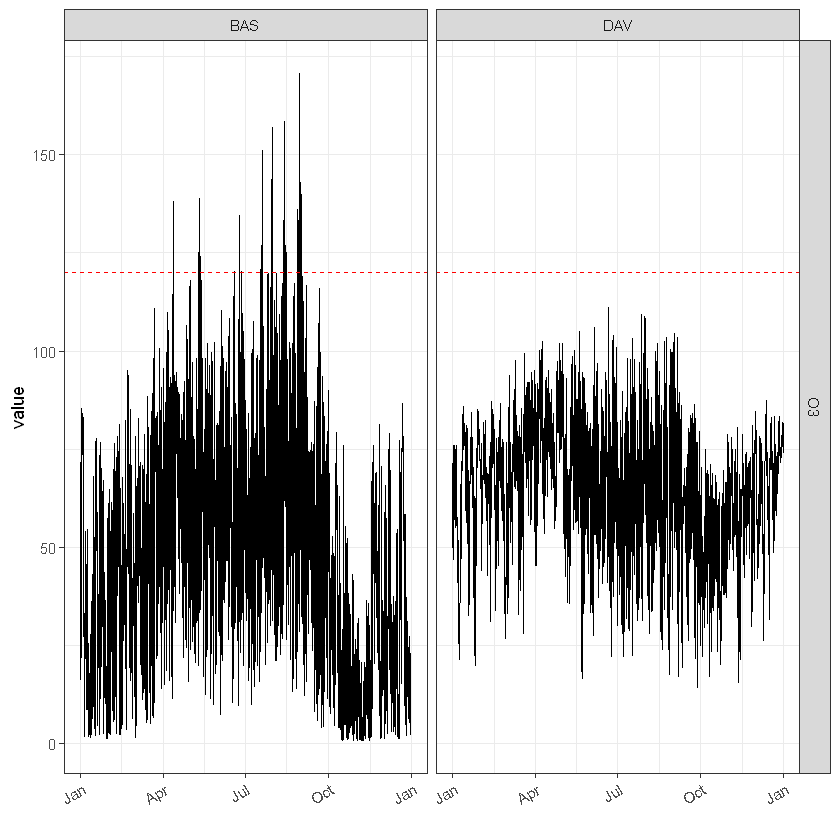

In [120]:
hourly_lf %>%
  filter(percent.recovery_hourly >= threshold) %>%
  ggplot(aes(x = datetime, y = value)) +        
  facet_grid(variable ~ site, scale = "free_y") +  
  geom_line() +                                 
  geom_hline(data = limits.hourly, aes(yintercept = value), linetype = 2, color = "red") + 
  scale_x_datetime(name = "", date_labels = "%b") +  # Use scale_x_datetime here
  theme(axis.text.x = element_text(angle = 30, hjust = 1))

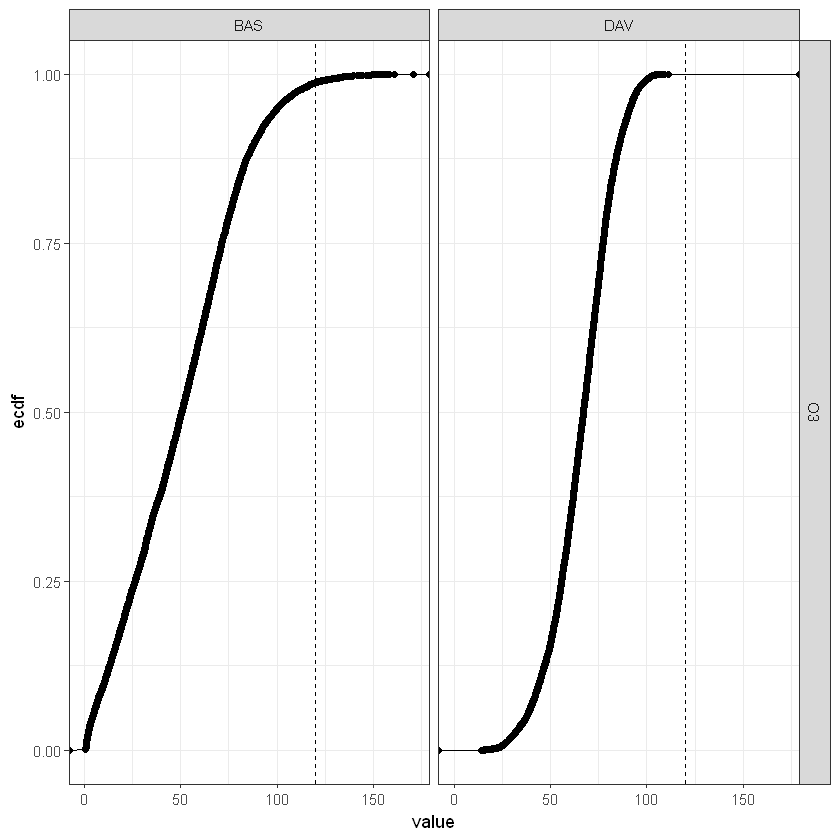

In [121]:
hourly_lf %>%
  filter(percent.recovery_hourly >= threshold) %>%
  ggplot+
  facet_grid(variable~site, scale="free_y")+  
  geom_line(aes(x=value), stat="ecdf")+
  geom_point(aes(x=value), stat="ecdf")+
  geom_vline(data=limits.hourly, mapping=aes(xintercept=value), linetype=2)

## Tables of hourly exceeding values

In [122]:
(hourly_limits.vec <- with(limits.hourly, setNames(value, variable)))

O3 
120

In [123]:
hourly_exceedances <- hourly_lf %>%
  filter(percent.recovery_hourly >= threshold &
         value > hourly_limits.vec[as.character(variable)])

In [124]:
head(hourly_exceedances)

site,datetime,variable,percent.recovery_hourly,value
<chr>,<dttm>,<chr>,<dbl>,<dbl>
BAS,2024-04-13,O3,100,123.2
BAS,2024-04-13,O3,100,129.9
BAS,2024-04-13,O3,100,134.7
BAS,2024-04-13,O3,100,134.0
BAS,2024-04-13,O3,100,138.0
BAS,2024-05-10,O3,100,121.8


In [125]:
tail(hourly_exceedances)

site,datetime,variable,percent.recovery_hourly,value
<chr>,<dttm>,<chr>,<dbl>,<dbl>
BAS,2024-09-01,O3,100,125.3
BAS,2024-09-01,O3,100,131.4
BAS,2024-09-01,O3,100,133.6
BAS,2024-09-01,O3,100,139.8
BAS,2024-09-01,O3,100,126.0
BAS,2024-09-01,O3,100,121.4


In [126]:
hourly_exceedances %>%
  count(site, variable)

site,variable,n
<chr>,<chr>,<int>
BAS,O3,109


In [127]:
hourly_exceedances %>%
  mutate(month = months(datetime)) %>%
  count(site, variable, month)

site,variable,month,n
<chr>,<chr>,<chr>,<int>
BAS,O3,April,5
BAS,O3,August,52
BAS,O3,July,24
BAS,O3,June,7
BAS,O3,May,15
BAS,O3,September,6
